## Progetto Data Science - Mihaela Krsteva Gruppo A
Il dataset considerato è HR Analytics - Employees attrition.

L'HR Analytics ci aiuta a interpretare i dati organizzativi. Individua le tendenze relative alle persone e consente al dipartimento risorse umane di prendere le misure appropriate per mantenere all'interno dell'azienda un buon clima e rendere l'organizzazione redditizia. Infatti, l'attrito in un'azienda è una delle sfide più complesse che i responsabili e il personale delle risorse umane devono affrontare.

Le possibili analisi e relazioni da effettuare sono:
- Attriti & frequenza dei viaggi lavorativi
- Attriti & anni di lavoro
- Attriti & anni di lavoro nell'azienda
- Livello di educazione & ruolo ricoperto
- Ruolo ricoperto & aumento percentuale del salario
- Sesso & salario

Link dataset: https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction?resource=download&select=HR-Employee-Attrition.csv

In [66]:
#Importazione del dataset

import plotly.io as pio
pio.renderers

import numpy as np
np.set_printoptions(precision=2)
import plotly.express as px
import plotly.graph_objs as gos
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv("HR-Employee-Attrition.csv")
df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Tipologia dei dati di ogni colonna


In [2]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Analisi Uomini vs. Donne

In [67]:
#Percentuale di uomini e donne presenti nel database

fig0=px.pie(data_frame=df,names="Gender")
fig0.layout["legend"]["title"] = "Sesso"
fig0.layout["title"] = "Sesso dei dipendenti:"
fig0.show()

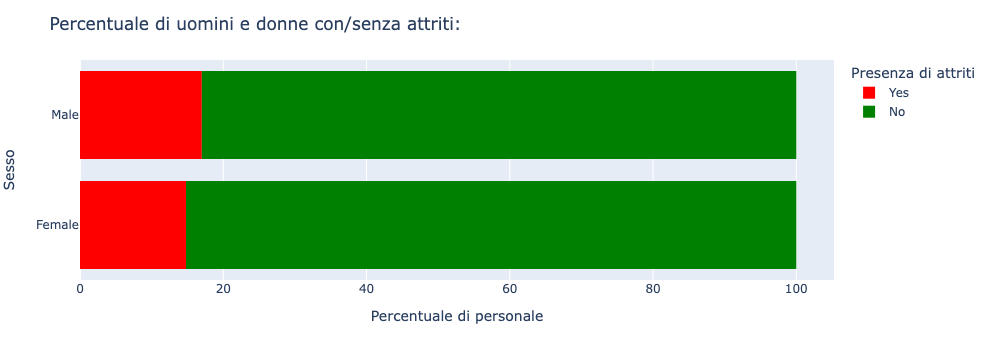

In [4]:
#Si analizza la percentuale di uomini/donne che hanno avuto attriti
#Si può dire che sono gli uomini a lamentare maggiormente la presenza di attritti in azienda

fig0 = px.histogram(data_frame = df, y= "Gender", color="Attrition", barmode="relative", 
                      text_auto=False, barnorm="percent", color_discrete_map={"Yes":"Red","No":"Green"})
fig0.layout["xaxis"]["title"] = "Percentuale di personale"
fig0.layout["yaxis"]["title"] = "Sesso"
fig0.layout["legend"]["title"] = "Presenza di attriti"
fig0.layout["title"] = "Percentuale di uomini e donne con/senza attriti:"
fig0.show()

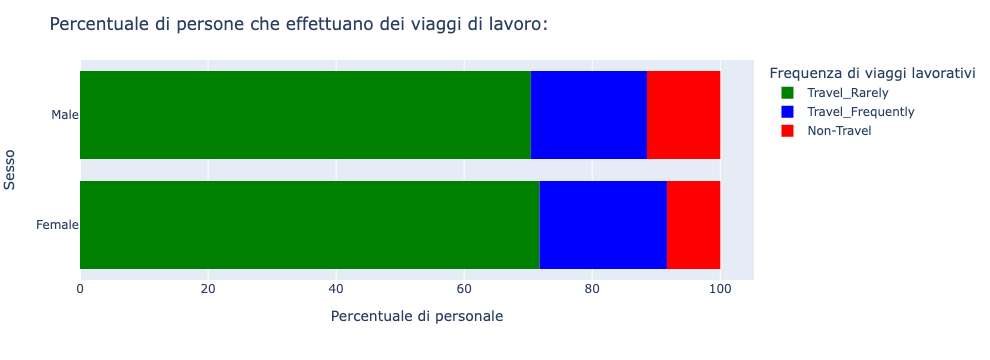

In [5]:
#Si analizza la frequenza dei viaggi lavorativi del personale
#Si può dire che le donne effettuano viaggi lavorativi più spesso rispetto agli uomini

fig0 = px.histogram(data_frame = df, y = "Gender", color="BusinessTravel", barmode="relative",
                   text_auto=False, barnorm="percent",
                    color_discrete_map={"Travel_Rarely":"Green","Travel_Frequently":"Blue", "Non-Travel":"Red"})
fig0.layout["xaxis"]["title"] = "Percentuale di personale"
fig0.layout["yaxis"]["title"] = "Sesso"
fig0.layout["legend"]["title"] = "Frequenza di viaggi lavorativi"
fig0.layout["title"] = "Percentuale di persone che effettuano dei viaggi di lavoro:"
fig0.show()

## Analisi dipartimentali

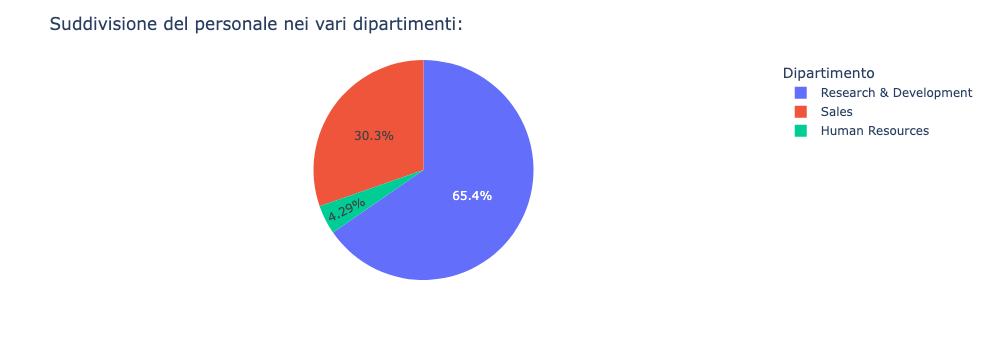

In [6]:
#Percentuale di dipendenti per ogni dipartimento

fig0=px.pie(data_frame=df,names="Department")
fig0.layout["legend"]["title"] = "Dipartimento"
fig0.layout["title"] = "Suddivisione del personale nei vari dipartimenti:"
fig0.show()

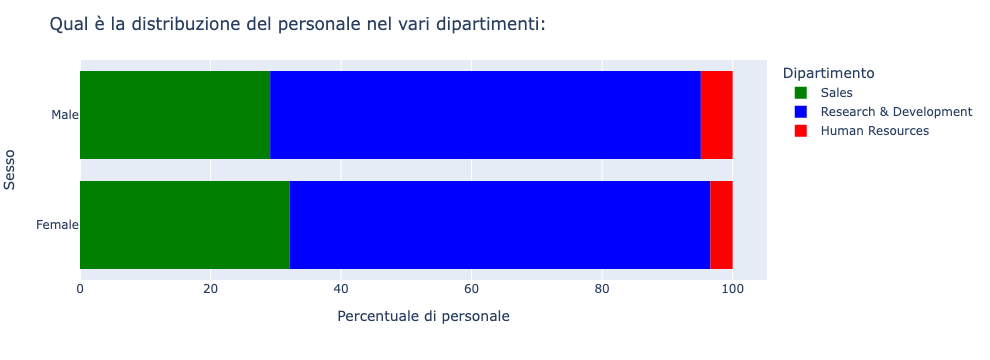

In [7]:
#Si analizza la pecentuale di dipendenti uomini/donne in ogni dipartimento
#Si può dire che la maggior parte dei dipendenti si trova nel dipartimento Ricerca&Sviluppo 
#e in generale sono suddivisi allo stesso modo

fig0 = px.histogram(data_frame = df, y= "Gender", color="Department", barmode="relative", 
                    text_auto=False, barnorm="percent", 
                    color_discrete_map={"Sales":"Green","Research & Development":"Blue", "Human Resources":"Red"})
fig0.layout["xaxis"]["title"] = "Percentuale di personale"
fig0.layout["yaxis"]["title"] = "Sesso"
fig0.layout["legend"]["title"] = "Dipartimento"
fig0.layout["title"] = "Qual è la distribuzione del personale nel vari dipartimenti:"
fig0.show()

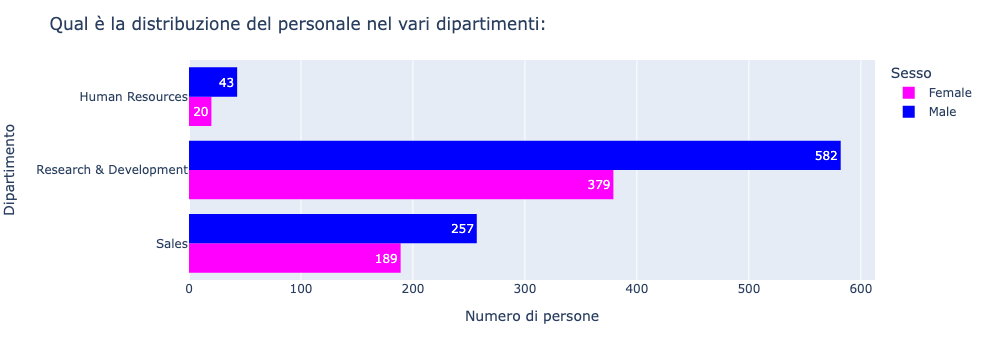

In [8]:
#Si analizza il numero di dipendenti uomini/donne in ogni dipartimento
#Come visto in precedenza sono distribuiti nello stesso modo

fig0 = px.histogram(data_frame = df, y= "Department", color="Gender", barmode='group',
                    text_auto=True, color_discrete_map={"Female":"Magenta","Male":"Blue"})
fig0.layout["xaxis"]["title"] = "Numero di persone"
fig0.layout["yaxis"]["title"] = "Dipartimento"
fig0.layout["legend"]["title"] = "Sesso"
fig0.layout["title"] = "Qual è la distribuzione del personale nel vari dipartimenti:"
fig0.show()

## Analisi sull'età

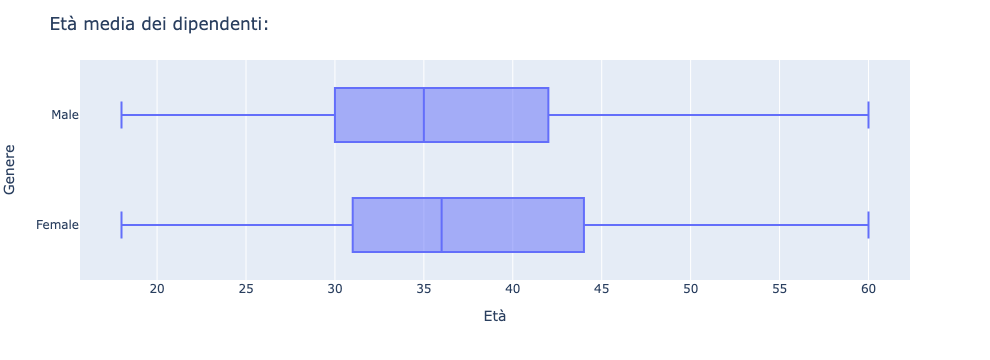

In [9]:
#Si analizza l'età per ogni sesso
#Si può dire che le donne hanno una media di 36 anni, mentre gli uomini 35

fig0= px.box(df, orientation="h", y="Gender", x="Age")
fig0.layout["xaxis"]["title"] = "Età"
fig0.layout["yaxis"]["title"] = "Genere"
fig0.layout["title"] = "Età media dei dipendenti:"
fig0.show()

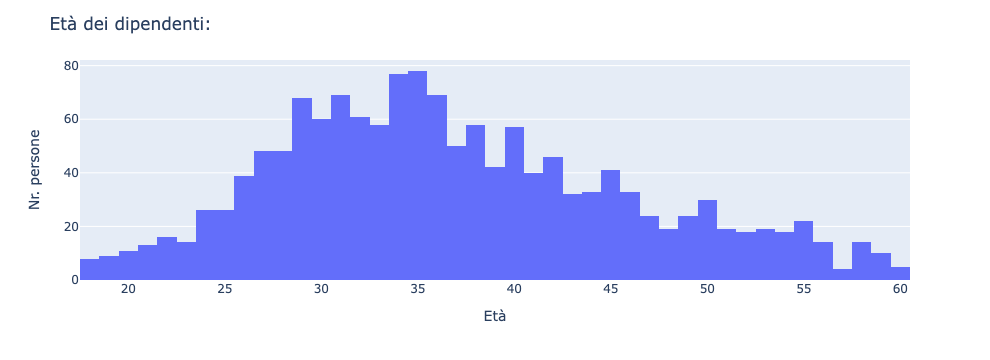

In [10]:
#Età dei dipendenti
fig0= px.histogram(df, x="Age")
fig0.layout["xaxis"]["title"] = "Età"
fig0.layout["yaxis"]["title"] = "Nr. persone"
fig0.layout["title"] = "Età dei dipendenti:"
fig0.show()

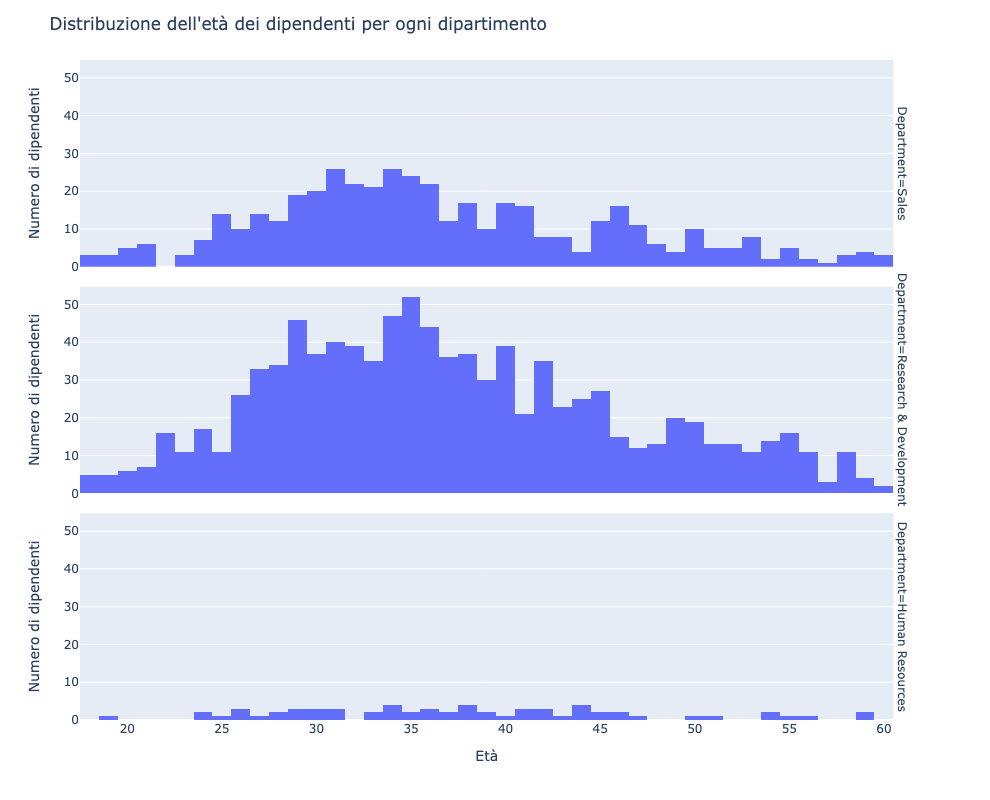

In [11]:
#Si analizza l'età dei dipendenti in ogni dipartimento
#Risulta essere però un'analisi poco utile in quanto in alcuni dipartimenti le persone sono poche

fig0= px.histogram(df, height=800, x="Age", facet_row="Department")
fig0.layout["xaxis"]["title"] = "Età"
fig0.layout["yaxis"]["title"] = "Numero di dipendenti"
fig0.layout["yaxis2"]["title"] = "Numero di dipendenti"
fig0.layout["yaxis3"]["title"] = "Numero di dipendenti"
fig0.layout["legend"]["title"] = "Dipartimento"
fig0.layout["title"] = "Distribuzione dell'età dei dipendenti per ogni dipartimento"
fig0.show()

## Analisi sugli attriti

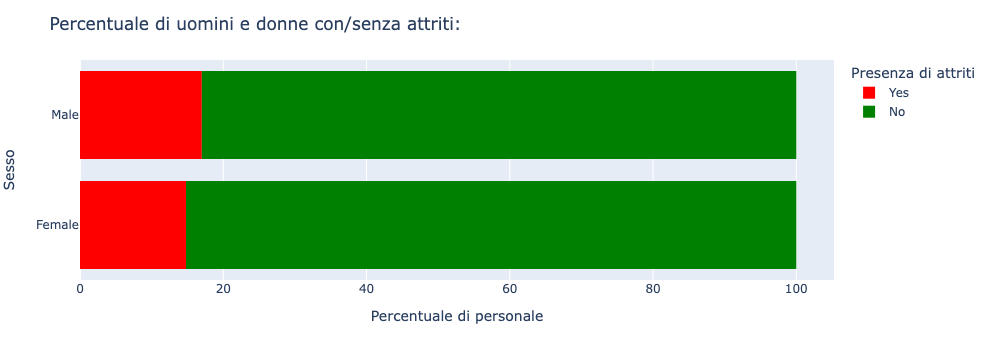

In [12]:
#RIPRESO DA SOPRA
#Si analizza la percentuale di uomini/donne che hanno avuto attriti
#Si può dire che sono gli uomini a lamentare maggiormente la presenza di attritti in azienda

fig0 = px.histogram(data_frame = df, y= "Gender", color="Attrition", barmode="relative", 
                      text_auto=False, barnorm="percent", color_discrete_map={"Yes":"Red","No":"Green"})
fig0.layout["xaxis"]["title"] = "Percentuale di personale"
fig0.layout["yaxis"]["title"] = "Sesso"
fig0.layout["legend"]["title"] = "Presenza di attriti"
fig0.layout["title"] = "Percentuale di uomini e donne con/senza attriti:"
fig0.show()

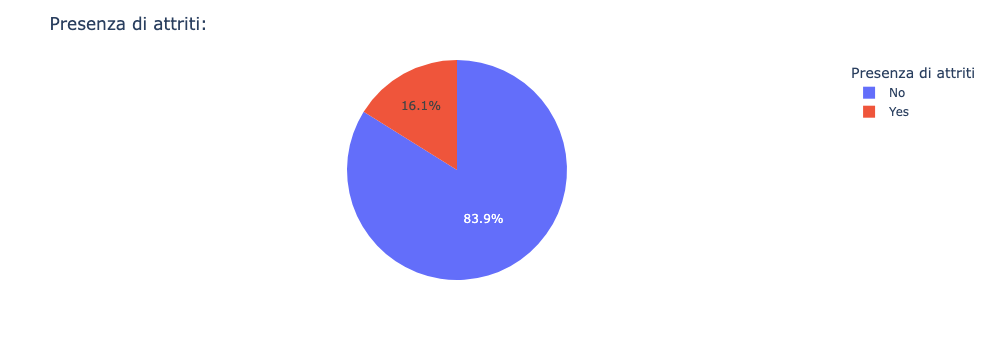

In [13]:
#Percentuale di attriti

fig0=px.pie(data_frame=df,names="Attrition")
fig0.layout["legend"]["title"] = "Presenza di attriti"
fig0.layout["title"] = "Presenza di attriti:"
fig0.show()

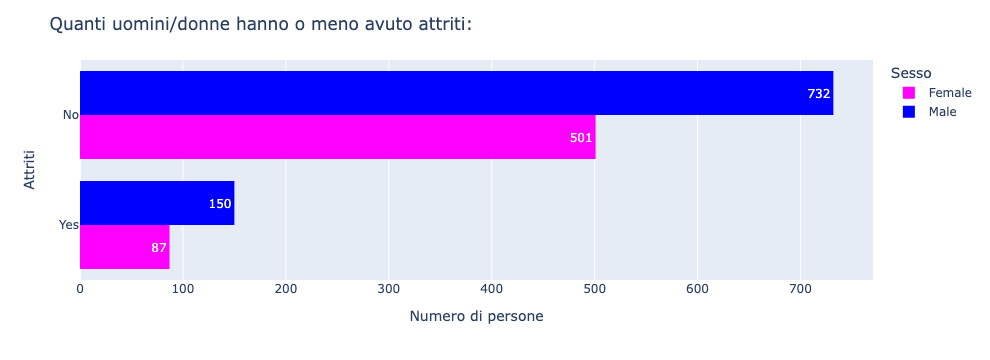

In [14]:
#Si analizza il numero di dipendenti uomini/donne che hanno avuto o meno attriti

fig0 = px.histogram(data_frame = df, y= "Attrition", color="Gender", barmode='group',
                    text_auto=True, color_discrete_map={"Female":"Magenta","Male":"Blue"})
fig0.layout["xaxis"]["title"] = "Numero di persone"
fig0.layout["yaxis"]["title"] = "Attriti"
fig0.layout["legend"]["title"] = "Sesso"
fig0.layout["title"] = "Quanti uomini/donne hanno o meno avuto attriti:"
fig0.show()

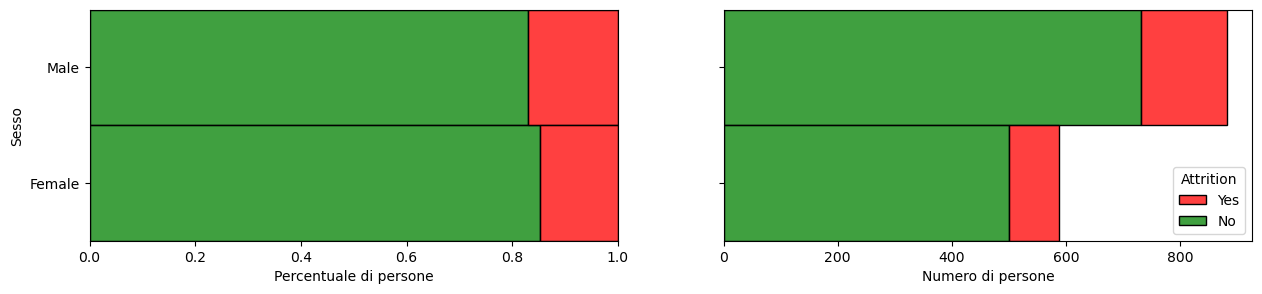

In [15]:
#I due grafici precedenti sono stati uniti per avere un'analisi più completa a colpo d'occhio

EmployeeCount=df["EmployeeCount"]
Gender=pd.Categorical(df["Gender"],["Male","Female"])
Attrition=df["Attrition"]

f, axs = plt.subplots(1, 2, sharey=True)
sns.histplot(y=Gender,hue=Attrition, palette=sns.blend_palette(["red","green"],2),
             multiple="fill",legend=False,ax=axs[0]).set(xlabel='Percentuale di persone', 
                                                         ylabel='Sesso')
sns.histplot(y=Gender,hue=Attrition, palette=sns.blend_palette(["red","green"],2), 
             multiple="stack",ax=axs[1]).set(xlabel='Numero di persone')
f.set_figheight(3)
f.set_figwidth(15)

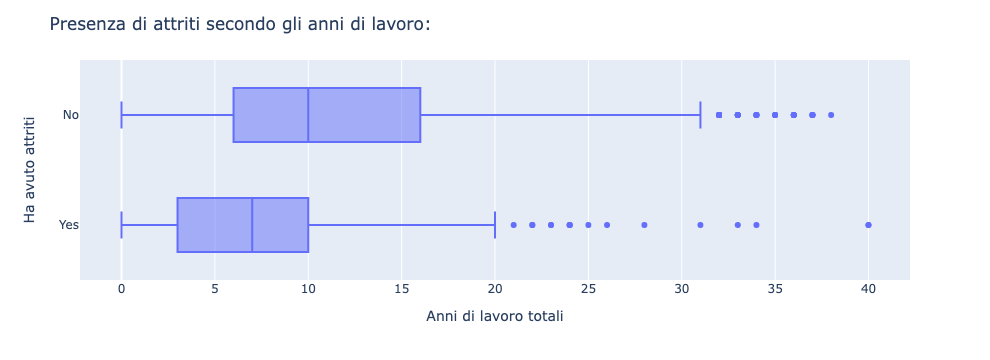

In [16]:
#Si analizza la presenza di attriti in relazione con gli anni di lavoro
#Chi ha avuto attriti tendenzialmente lavora da meno anni 

fig0= px.box(df, orientation="h", y="Attrition", x="TotalWorkingYears")
fig0.layout["xaxis"]["title"] = "Anni di lavoro totali"
fig0.layout["yaxis"]["title"] = "Ha avuto attriti"
fig0.layout["title"] = "Presenza di attriti secondo gli anni di lavoro:"
fig0.show()

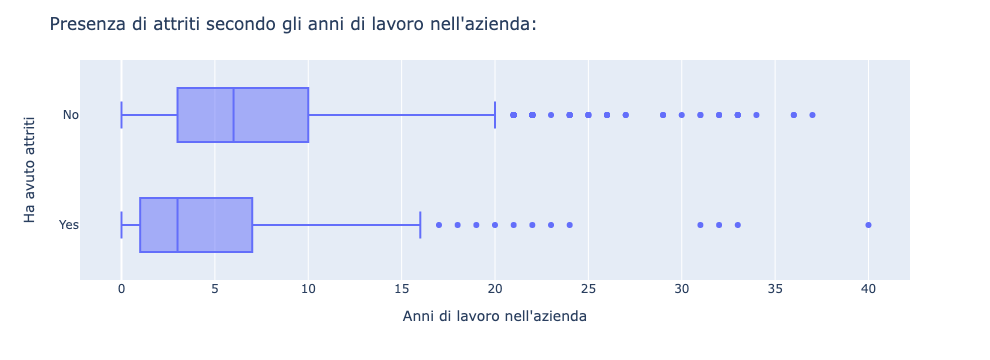

In [17]:
#Si può riscontrare lo stesso andamento con gli anni di lavoro nell'azienda
#Anche in azienda colore che hanno verificato degli attriti lavorano in essa da meno tempo

fig0= px.box(df, orientation="h", y="Attrition", x="YearsAtCompany")
fig0.layout["xaxis"]["title"] = "Anni di lavoro nell'azienda"
fig0.layout["yaxis"]["title"] = "Ha avuto attriti"
fig0.layout["title"] = "Presenza di attriti secondo gli anni di lavoro nell'azienda:"
fig0.show()

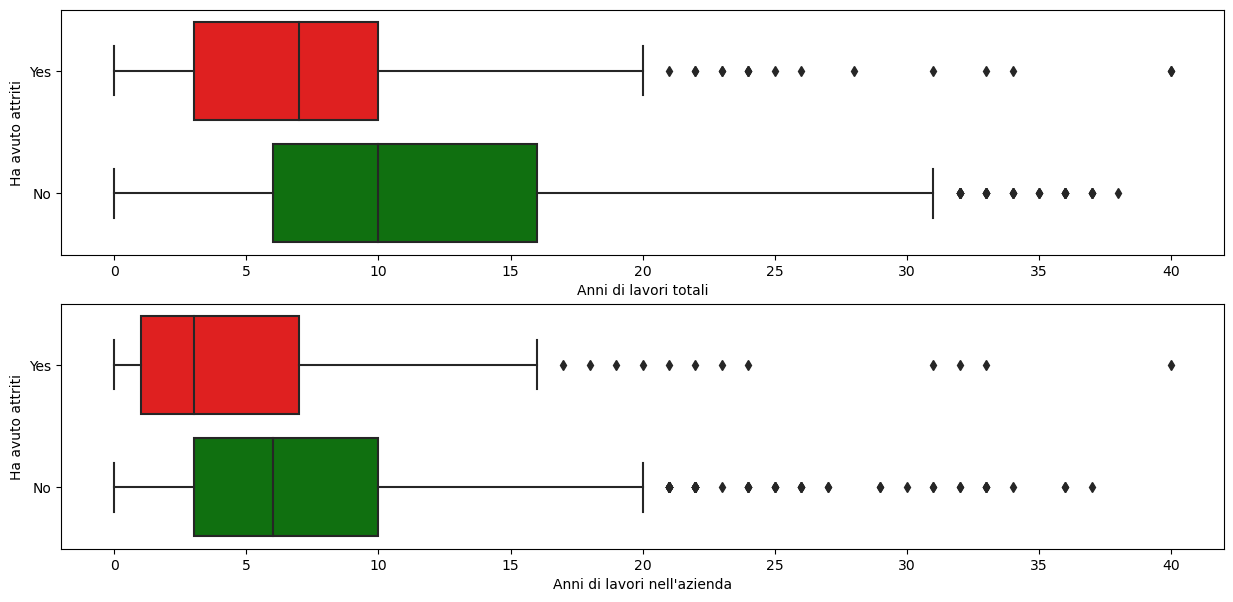

In [18]:
#I due grafici precedenti sono stati uniti per avere un'analisi più completa a colpo d'occhio

f, axs = plt.subplots(2, 1)
sns.boxplot(df, y="Attrition", x="TotalWorkingYears",palette=sns.blend_palette(["red","green"],2),
            ax=axs[0]).set(xlabel='Anni di lavori totali', ylabel='Ha avuto attriti')
sns.boxplot(df, y="Attrition", x="YearsAtCompany",palette=sns.blend_palette(["red","green"],2),
            ax=axs[1]).set(xlabel="Anni di lavori nell'azienda", ylabel='Ha avuto attriti')
f.set_figheight(7)
f.set_figwidth(15)

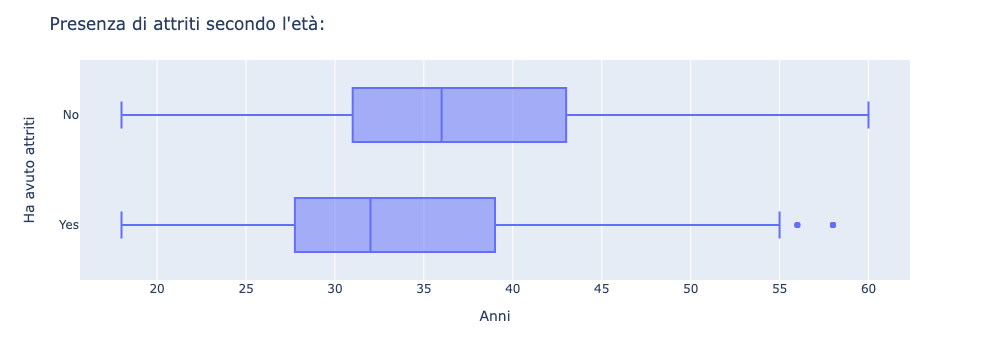

In [19]:
#Si analizza la presenza di attriti in relazione con l'età dei dipendenti
#L'età di coloro che percepiscono attriti (32 anni) è più bassa di quelli che non la percepiscono (36 anni)

fig0= px.box(df, orientation="h", y="Attrition", x="Age")
fig0.layout["xaxis"]["title"] = "Anni"
fig0.layout["yaxis"]["title"] = "Ha avuto attriti"
fig0.layout["title"] = "Presenza di attriti secondo l'età:"
fig0.show()

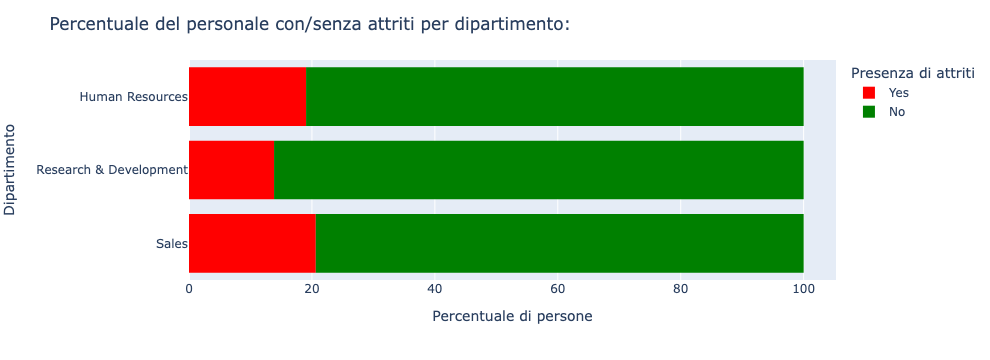

In [20]:
#Si analizza la percentuale del personale che ha avuto attriti in base al loro dipartimento
#Si può dire che nel dipartimento sales si trovano la maggior parte di attritti in azienda

fig0 = px.histogram(data_frame = df, y= "Department", color="Attrition", barmode="relative", 
                      text_auto=False, barnorm="percent", color_discrete_map={"Yes":"Red","No":"Green"})
fig0.layout["xaxis"]["title"] = "Percentuale di persone"
fig0.layout["yaxis"]["title"] = "Dipartimento"
fig0.layout["legend"]["title"] = "Presenza di attriti"
fig0.layout["title"] = "Percentuale del personale con/senza attriti per dipartimento:"
fig0.show()

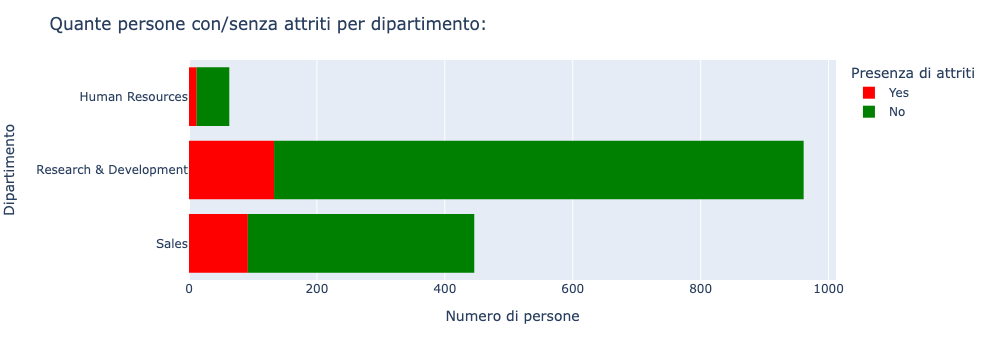

In [21]:
#Si analizza il numero di persone che ha avuto attriti in base al loro dipartimento
#Nel dipartimento R&D ci sono più persone che sentono attriti ma rispetto al nr totale di persone, 
#come visto nel grafico precedente, sono di piu quelli del sales

fig0 = px.histogram(data_frame = df, y= "Department", color="Attrition", barmode='relative',
                    text_auto=False, color_discrete_map={"Yes":"Red","No":"Green"})
fig0.layout["xaxis"]["title"] = "Numero di persone"
fig0.layout["yaxis"]["title"] = "Dipartimento"
fig0.layout["legend"]["title"] = "Presenza di attriti"
fig0.layout["title"] = "Quante persone con/senza attriti per dipartimento:"
fig0.show()

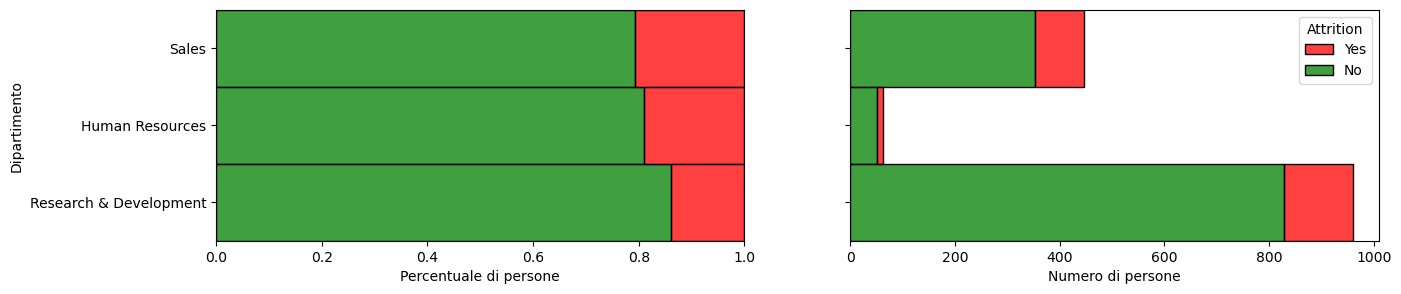

In [22]:
#I due grafici precedenti sono stati uniti per avere un'analisi più completa a colpo d'occhio

EmployeeCount=df["EmployeeCount"]
Department=pd.Categorical(df["Department"],["Sales","Human Resources","Research & Development"])
Attrition=df["Attrition"]

f, axs = plt.subplots(1, 2, sharey=True)
sns.histplot(y=Department,hue=Attrition, palette=sns.blend_palette(["red","green"],2),
             multiple="fill",legend=False,ax=axs[0]).set(xlabel='Percentuale di persone', 
                                                         ylabel='Dipartimento')
sns.histplot(y=Department,hue=Attrition, palette=sns.blend_palette(["red","green"],2), 
             multiple="stack",ax=axs[1]).set(xlabel='Numero di persone')
f.set_figheight(3)
f.set_figwidth(15)

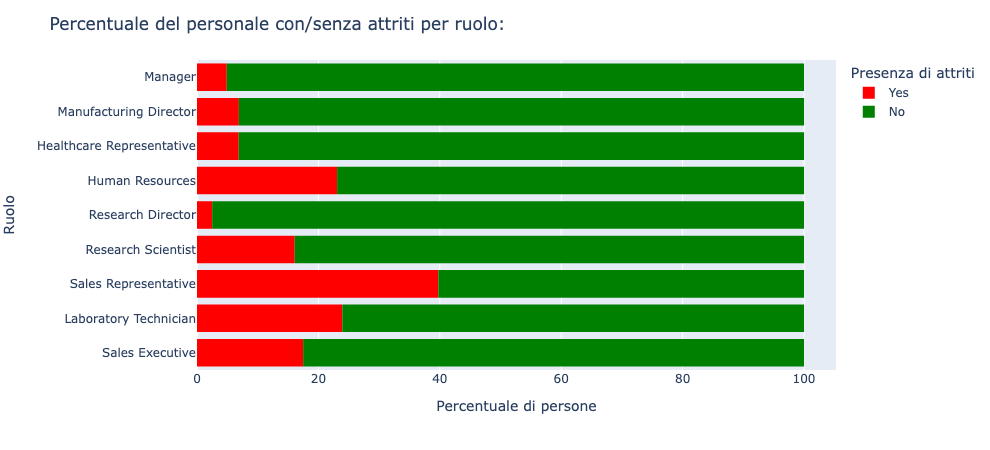

In [23]:
#Si analizza la percentuale del personale che ha avuto attriti in base al loro ruolo
#Si può dire che i sales rappresentative sono coloro che hanno più attiti

fig0 = px.histogram(data_frame = df, height=450, y= "JobRole", color="Attrition", barmode="relative", 
                      text_auto=False, barnorm="percent", color_discrete_map={"Yes":"Red","No":"Green"})
fig0.layout["xaxis"]["title"] = "Percentuale di persone"
fig0.layout["yaxis"]["title"] = "Ruolo"
fig0.layout["legend"]["title"] = "Presenza di attriti"
fig0.layout["title"] = "Percentuale del personale con/senza attriti per ruolo:"
fig0.show()

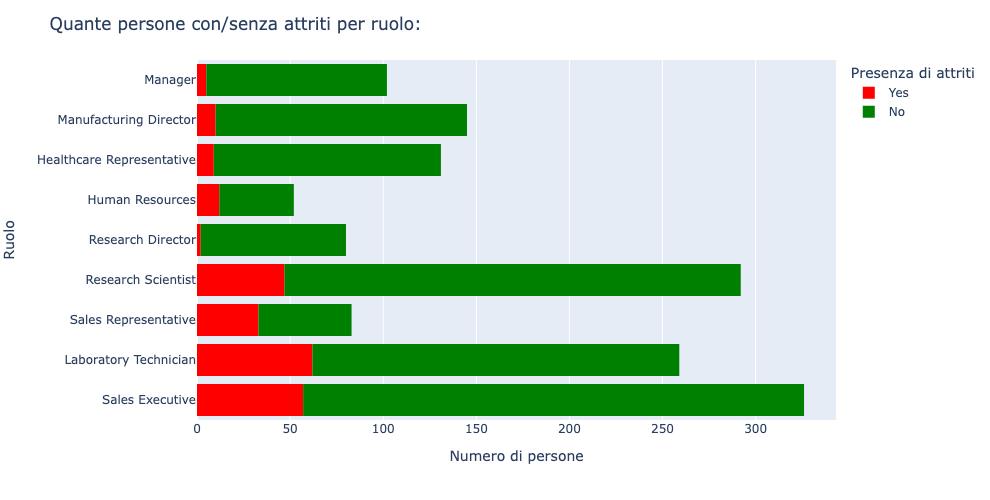

In [24]:
#Si analizza il numero di persone che ha avuto attriti in base al loro ruolo
#Si può dire che i laboratory technician e i sales executive hanno più persone che lamentano degli attriti
#ma bisogna ricordarsi che in percentuale sono i sales representative

fig0 = px.histogram(data_frame = df,height=500, y= "JobRole", color="Attrition", barmode='relative',
                    text_auto=False, color_discrete_map={"Yes":"Red","No":"Green"})
fig0.layout["xaxis"]["title"] = "Numero di persone"
fig0.layout["yaxis"]["title"] = "Ruolo"
fig0.layout["legend"]["title"] = "Presenza di attriti"
fig0.layout["title"] = "Quante persone con/senza attriti per ruolo:"
fig0.show()

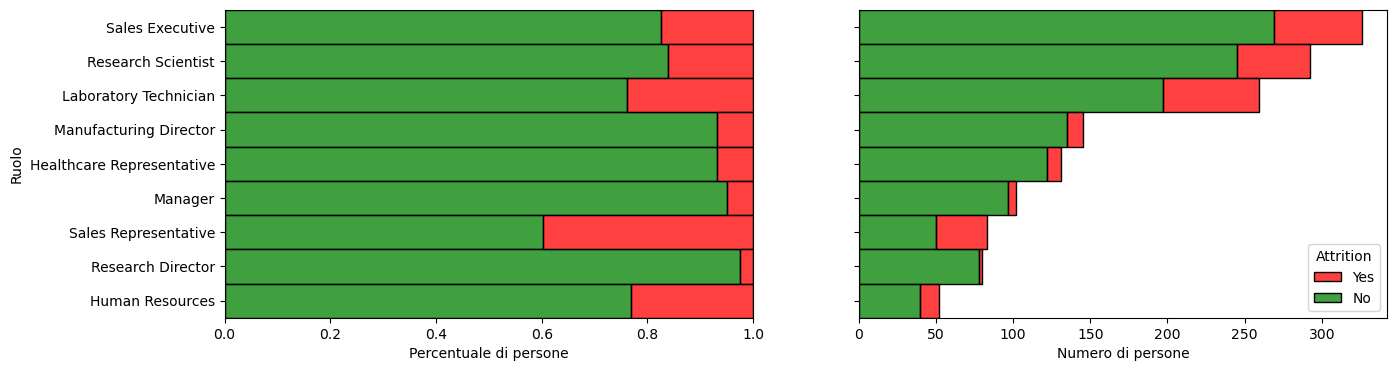

In [25]:
#I due grafici precedenti sono stati uniti per avere un'analisi più completa a colpo d'occhio

EmployeeCount=df["EmployeeCount"]
JobRole=df["JobRole"]
Attrition=df["Attrition"]

f, axs = plt.subplots(1, 2, sharey=True)
sns.histplot(y=JobRole,hue=Attrition, palette=sns.blend_palette(["red","green"],2),
             multiple="fill",legend=False,ax=axs[0]).set(xlabel='Percentuale di persone', 
                                                         ylabel='Ruolo')
sns.histplot(y=JobRole,hue=Attrition, palette=sns.blend_palette(["red","green"],2), 
             multiple="stack",ax=axs[1]).set(xlabel='Numero di persone')
f.set_figheight(4)
f.set_figwidth(15)

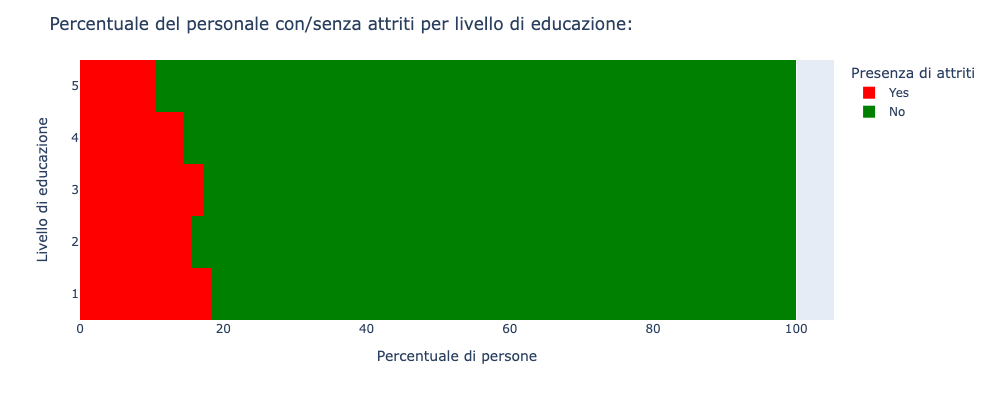

In [26]:
#Si analizza la percentuale del personale che ha avuto attriti in base alla loro educazione
#Si può dire che coloro che hanno un livello di educazione più basso hanno più attriti

fig0 = px.histogram(data_frame = df, height=400, y= "Education", color="Attrition", barmode="relative", 
                      text_auto=False, barnorm="percent", color_discrete_map={"Yes":"Red","No":"Green"})
fig0.layout["xaxis"]["title"] = "Percentuale di persone"
fig0.layout["yaxis"]["title"] = "Livello di educazione"
fig0.layout["legend"]["title"] = "Presenza di attriti"
fig0.layout["title"] = "Percentuale del personale con/senza attriti per livello di educazione:"
fig0.show()

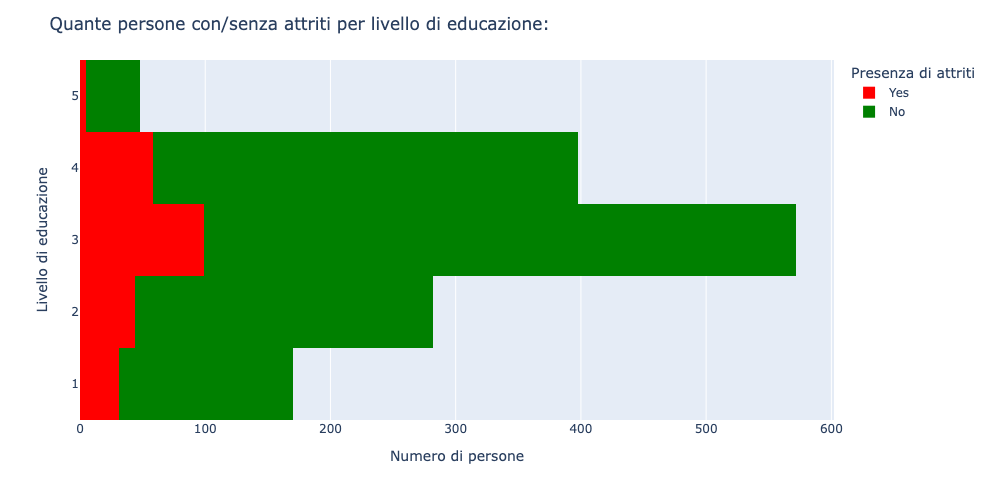

In [27]:
#Si analizza il numero di persone che ha avuto attriti in base alla loro educazione
#Si può dire che, come dal grafico precedente, coloro che hanno un livello di educazione pari a 3 hanno più attriti

fig0 = px.histogram(data_frame = df,height=500, y= "Education", color="Attrition", barmode='relative',
                    text_auto=False, color_discrete_map={"Yes":"Red","No":"Green"})
fig0.layout["xaxis"]["title"] = "Numero di persone"
fig0.layout["yaxis"]["title"] = "Livello di educazione"
fig0.layout["legend"]["title"] = "Presenza di attriti"
fig0.layout["title"] = "Quante persone con/senza attriti per livello di educazione:"
fig0.show()

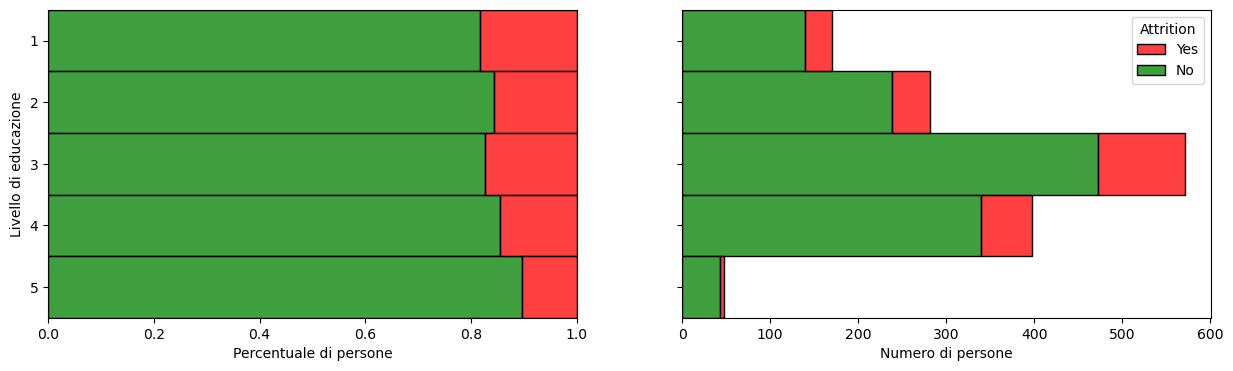

In [28]:
#I due grafici precedenti sono stati uniti per avere un'analisi più completa a colpo d'occhio

EmployeeCount=df["EmployeeCount"]
Education=pd.Categorical(df["Education"],[1,2,3,4,5])
Attrition=df["Attrition"]

f, axs = plt.subplots(1, 2, sharey=True)
sns.histplot(y=Education,hue=Attrition, palette=sns.blend_palette(["red","green"],2),
             multiple="fill",legend=False,ax=axs[0]).set(xlabel='Percentuale di persone', 
                                                         ylabel='Livello di educazione')
sns.histplot(y=Education,hue=Attrition, palette=sns.blend_palette(["red","green"],2), 
             multiple="stack",ax=axs[1]).set(xlabel='Numero di persone')
f.set_figheight(4)
f.set_figwidth(15)

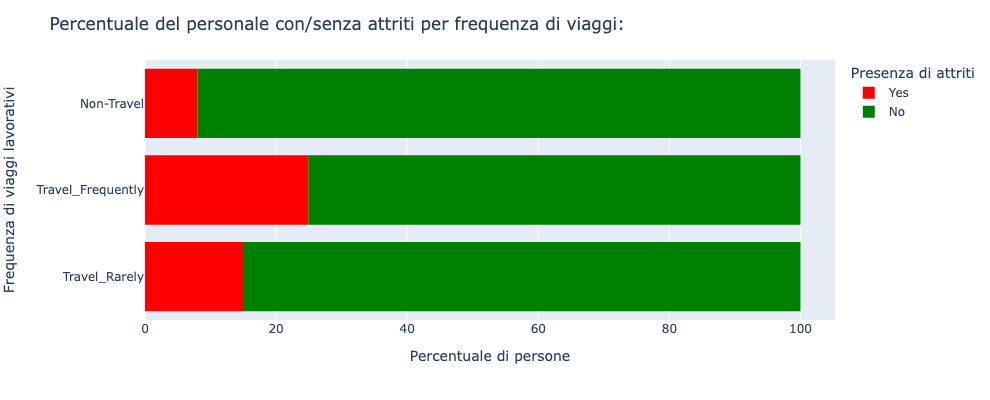

In [29]:
#Si analizza la percentuale del personale che ha avuto attriti in base alla frequenza dei viaggi lavorativi
#Si può dire che coloro che viaggiano più spesso sono coloro che hanno più attiti

fig0 = px.histogram(data_frame = df, height=400, y= "BusinessTravel", color="Attrition", barmode="relative", 
                      text_auto=False, barnorm="percent", color_discrete_map={"Yes":"Red","No":"Green"})
fig0.layout["xaxis"]["title"] = "Percentuale di persone"
fig0.layout["yaxis"]["title"] = "Frequenza di viaggi lavorativi"
fig0.layout["legend"]["title"] = "Presenza di attriti"
fig0.layout["title"] = "Percentuale del personale con/senza attriti per frequenza di viaggi:"
fig0.show()

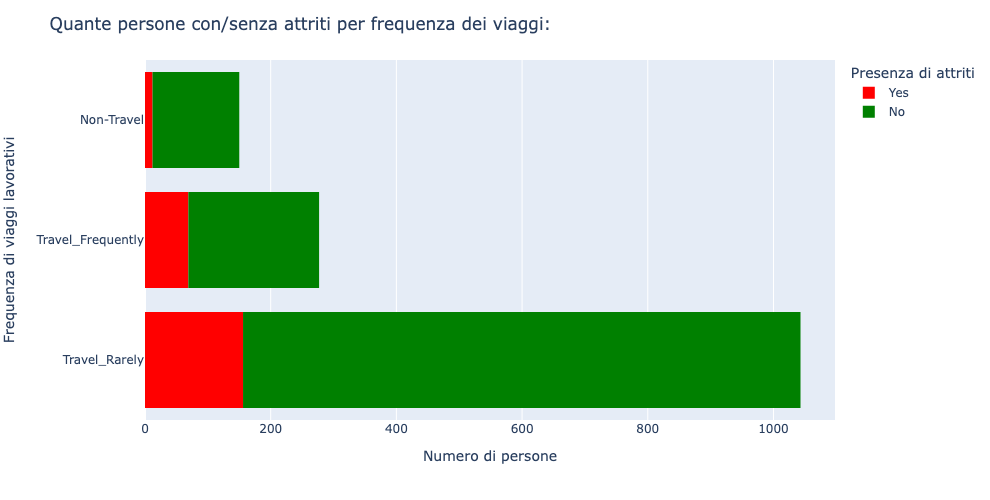

In [30]:
#Si analizza il numero di persone che ha avuto attriti in base alla frequenza dei viaggi lavorativi
#Anche in questo caso si può dire che coloro che viaggiano più spesso sono coloro che hanno più attiti

fig0 = px.histogram(data_frame = df,height=500, y= "BusinessTravel", color="Attrition", barmode='relative',
                    text_auto=False, color_discrete_map={"Yes":"Red","No":"Green"})
fig0.layout["xaxis"]["title"] = "Numero di persone"
fig0.layout["yaxis"]["title"] = "Frequenza di viaggi lavorativi"
fig0.layout["legend"]["title"] = "Presenza di attriti"
fig0.layout["title"] = "Quante persone con/senza attriti per frequenza dei viaggi:"
fig0.show()

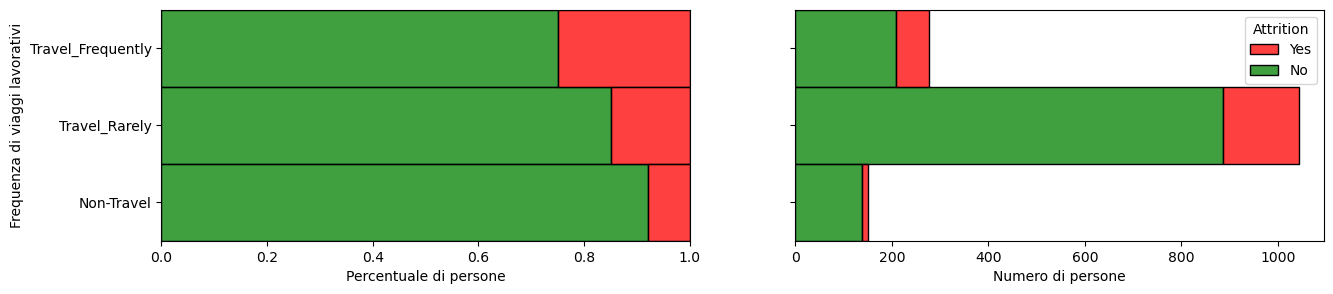

In [31]:
#I due grafici precedenti sono stati uniti per avere un'analisi più completa a colpo d'occhio

EmployeeCount=df["EmployeeCount"]
BusinessTravel=pd.Categorical(df["BusinessTravel"],["Travel_Frequently","Travel_Rarely","Non-Travel"])
Attrition=df["Attrition"]

f, axs = plt.subplots(1, 2, sharey=True)
sns.histplot(y=BusinessTravel,hue=Attrition, palette=sns.blend_palette(["red","green"],2),
             multiple="fill",legend=False,ax=axs[0]).set(xlabel='Percentuale di persone', 
                                                         ylabel='Frequenza di viaggi lavorativi')
sns.histplot(y=BusinessTravel,hue=Attrition, palette=sns.blend_palette(["red","green"],2), 
             multiple="stack",ax=axs[1]).set(xlabel='Numero di persone')
f.set_figheight(3)
f.set_figwidth(15)

## Analisi supplementari
Le analisi effettuate da qui in avanti non sono state esposte durante le presentazioni in quanto, il database
è sprovvisto di alcune unità quali: la valuta, il periodo preso in analisi (es. l'aumento dello stipendio è annuale/ogni x anni?)... La mancanza di questi dati quindi porta a non ottenere delle conclusioni precise dai grafici.

Purtroppo la mancanza di queste unità la si è notata solamente dopo le analisi fatte, di conseguenza non si è voluto cancellare il lavoro fatto.

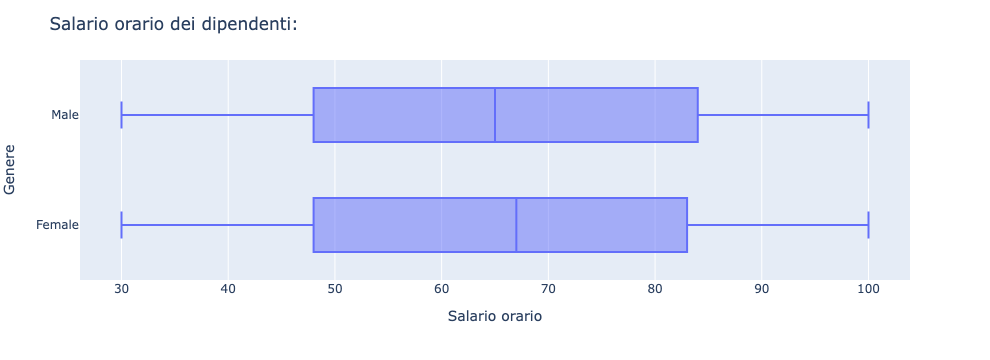

In [32]:
#Si analizza il salario orario dei dipendenti per genere
#Si può dire che le donne hanno un salario medio di 67, mentre gli uomini di 65

fig0= px.box(df, orientation="h", y="Gender", x="HourlyRate")
fig0.layout["xaxis"]["title"] = "Salario orario"
fig0.layout["yaxis"]["title"] = "Genere"
fig0.layout["title"] = "Salario orario dei dipendenti:"
fig0.show()

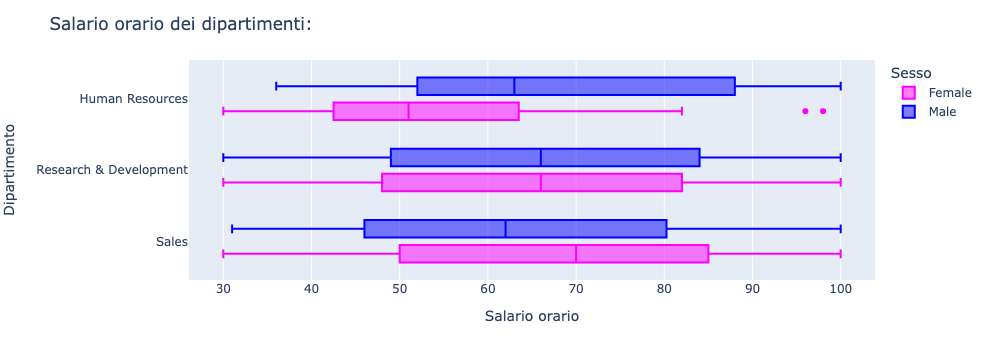

In [33]:
#Salario dei dipendenti in base al dipartimento di appartenenza

fig0= px.box(df, orientation="h", y="Department", x="HourlyRate", color="Gender", 
             color_discrete_map={"Female":"Magenta","Male":"Blue"})
fig0.layout["xaxis"]["title"] = "Salario orario"
fig0.layout["yaxis"]["title"] = "Dipartimento"
fig0.layout["legend"]["title"] = "Sesso"
fig0.layout["title"] = "Salario orario dei dipartimenti:"
fig0.show()

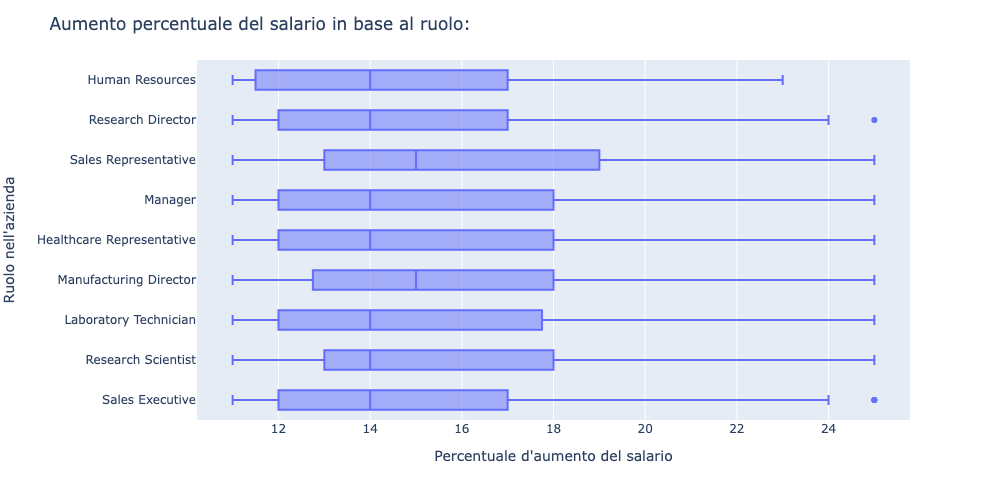

In [34]:
#Aumento del salario per ogni ruolo

fig0= px.box(df, orientation="h", height=500, y="JobRole", x="PercentSalaryHike", 
              category_orders={})
fig0.layout["xaxis"]["title"] = "Percentuale d'aumento del salario"
fig0.layout["yaxis"]["title"] = "Ruolo nell'azienda"
fig0.layout["title"] = "Aumento percentuale del salario in base al ruolo:"
fig0.show()

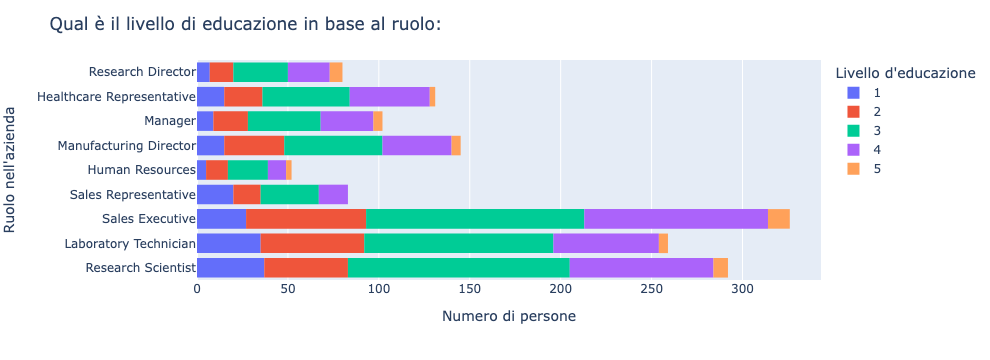

In [35]:
#Livello di educazione per ogni ruolo

fig0 = px.histogram(data_frame = df, y= "JobRole", color="Education",
                category_orders={"Education":[1,2,3,4,5]})
fig0.layout["xaxis"]["title"] = "Numero di persone"
fig0.layout["yaxis"]["title"] = "Ruolo nell'azienda"
fig0.layout["legend"]["title"] = "Livello d'educazione"
fig0.layout["title"] = "Qual è il livello di educazione in base al ruolo:"
fig0.show()